In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['axes.unicode_minus'] = False

In [4]:
f_path = '/Library/Fonts/AppleGothic.ttf'

In [5]:
font_name = font_manager.FontProperties(fname=f_path).get_name()

In [6]:
rc('font', family=font_name)

In [7]:
pinkwink_web = pd.read_csv('data/07_PW_Web.csv', encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)

In [8]:
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]

In [9]:
pinkwink_web.head()

,hit
date,
16. 1. 1.,238
16. 1. 2.,316
16. 1. 3.,303
16. 1. 4.,645
16. 1. 5.,753


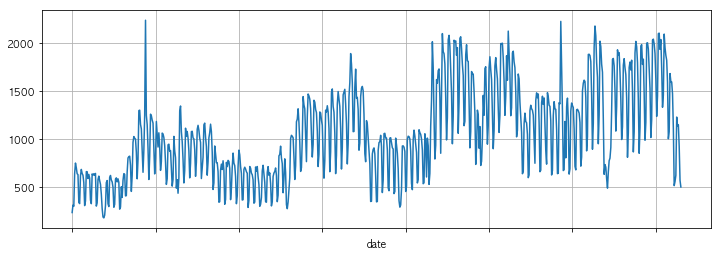

In [10]:
pinkwink_web['hit'].plot(figsize=(12, 4), grid=True)

In [11]:
pinkwink_web['cnt'] = np.arange(0, len(pinkwink_web), 1)
pinkwink_web.head()

,hit,cnt
date,,
16. 1. 1.,238,0
16. 1. 2.,316,1
16. 1. 3.,303,2
16. 1. 4.,645,3
16. 1. 5.,753,4


In [12]:
fp1 = np.polyfit(pinkwink_web['cnt'], pinkwink_web['hit'], 1)
fp1

array([  1.33240162, 573.15630957])

In [13]:
f1 = np.poly1d(fp1)
f1

poly1d([  1.33240162, 573.15630957])

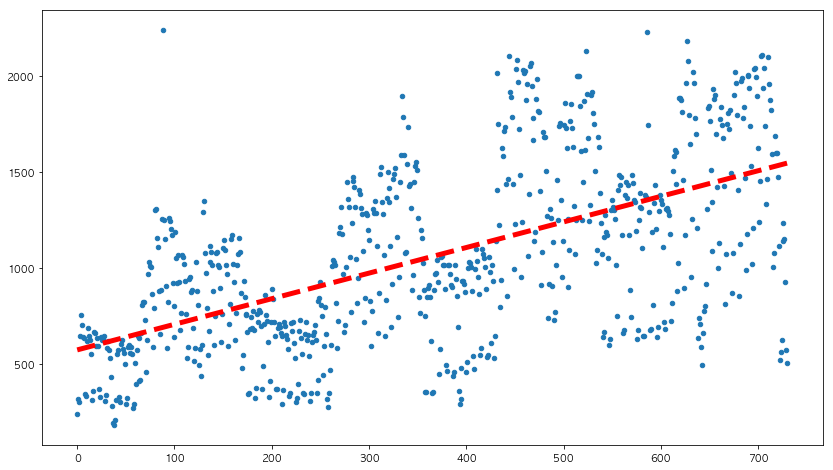

In [14]:
plt.figure(figsize=(14, 8))
plt.scatter(pinkwink_web['cnt'], pinkwink_web['hit'], s=20)
plt.plot(pinkwink_web['cnt'], f1(pinkwink_web['cnt']), ls='dashed', lw=5, color='r')
plt.show()

In [15]:
raw_data = np.genfromtxt('data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [16]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [17]:
xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

<IPython.core.display.Javascript object>


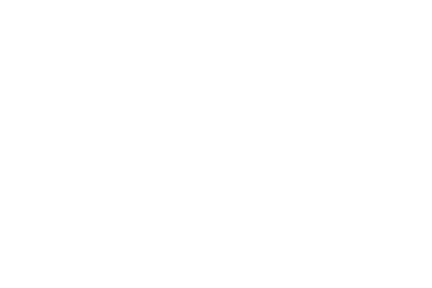

<IPython.core.display.Javascript object>


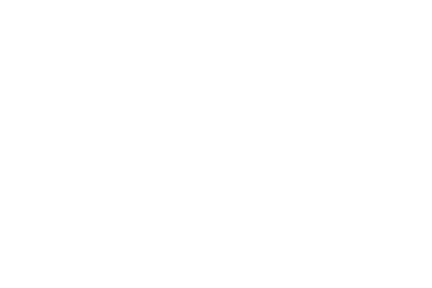

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [19]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop

np.random.seed(13)

Using TensorFlow backend.


In [20]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)
y_data = y_data.reshape((25, 1))

rmsprop = RMSprop(lr=0.01)

In [21]:
model = Sequential()
model.add(Dense(1, input_shape=(2, )))
model.compile(loss='mse', optimizer=rmsprop)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

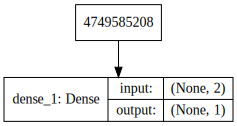

In [23]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
25/25 [==============================] - 0s 4ms/step - loss: 134896.7344
Epoch 2/1000
25/25 [==============================] - 0s 70us/step - loss: 132375.2031
Epoch 3/1000
25/25 [==============================] - 0s 63us/step - loss: 130569.5000
Epoch 4/1000
25/25 [==============================] - 0s 104us/step - loss: 129071.4922
Epoch 5/1000
25/25 [==============================] - 0s 70us/step - loss: 127751.9062
Epoch 6/1000
25/25 [==============================] - 0s 66us/step - loss: 126550.8125
Epoch 7/1000
25/25 [==============================] - 0s 76us/step - loss: 125434.8438
Epoch 8/1000
25/25 [==============================] - 0s 77us/step - loss: 124383.3125
Epoch 9/1000
25/25 [==============================] - 0s 55us/step - loss: 123382.3203
Epoch 10/1000
25/25 [==============================] - 0s 67us/step - loss: 122422.1016
Epoch 11/1000
25/25 [==============================] - 0s 49us/step - loss: 121495.4531
Epoch 12/1000
25/25 [====================

Epoch 95/1000
25/25 [==============================] - 0s 342us/step - loss: 66771.5625
Epoch 96/1000
25/25 [==============================] - 0s 79us/step - loss: 66237.3438
Epoch 97/1000
25/25 [==============================] - 0s 80us/step - loss: 65705.4766
Epoch 98/1000
25/25 [==============================] - 0s 77us/step - loss: 65175.9453
Epoch 99/1000
25/25 [==============================] - 0s 177us/step - loss: 64648.7617
Epoch 100/1000
25/25 [==============================] - 0s 68us/step - loss: 64123.9297
Epoch 101/1000
25/25 [==============================] - 0s 76us/step - loss: 63601.4336
Epoch 102/1000
25/25 [==============================] - 0s 67us/step - loss: 63081.2852
Epoch 103/1000
25/25 [==============================] - 0s 84us/step - loss: 62563.4844
Epoch 104/1000
25/25 [==============================] - 0s 68us/step - loss: 62048.0312
Epoch 105/1000
25/25 [==============================] - 0s 61us/step - loss: 61534.9102
Epoch 106/1000
25/25 [=============

Epoch 188/1000
25/25 [==============================] - 0s 360us/step - loss: 27058.5859
Epoch 189/1000
25/25 [==============================] - 0s 96us/step - loss: 26740.1543
Epoch 190/1000
25/25 [==============================] - 0s 110us/step - loss: 26424.0059
Epoch 191/1000
25/25 [==============================] - 0s 75us/step - loss: 26110.1445
Epoch 192/1000
25/25 [==============================] - 0s 127us/step - loss: 25798.5684
Epoch 193/1000
25/25 [==============================] - 0s 148us/step - loss: 25489.2656
Epoch 194/1000
25/25 [==============================] - 0s 100us/step - loss: 25182.2480
Epoch 195/1000
25/25 [==============================] - 0s 59us/step - loss: 24877.5098
Epoch 196/1000
25/25 [==============================] - 0s 87us/step - loss: 24575.0508
Epoch 197/1000
25/25 [==============================] - 0s 72us/step - loss: 24274.8633
Epoch 198/1000
25/25 [==============================] - 0s 44us/step - loss: 23976.9570
Epoch 199/1000
25/25 [=====

Epoch 282/1000
25/25 [==============================] - 0s 53us/step - loss: 6906.5371
Epoch 283/1000
25/25 [==============================] - 0s 85us/step - loss: 6794.9702
Epoch 284/1000
25/25 [==============================] - 0s 212us/step - loss: 6685.4531
Epoch 285/1000
25/25 [==============================] - 0s 51us/step - loss: 6577.9756
Epoch 286/1000
25/25 [==============================] - 0s 81us/step - loss: 6472.5332
Epoch 287/1000
25/25 [==============================] - 0s 162us/step - loss: 6369.1191
Epoch 288/1000
25/25 [==============================] - 0s 63us/step - loss: 6267.7275
Epoch 289/1000
25/25 [==============================] - 0s 76us/step - loss: 6168.3511
Epoch 290/1000
25/25 [==============================] - 0s 50us/step - loss: 6070.9844
Epoch 291/1000
25/25 [==============================] - 0s 179us/step - loss: 5975.6162
Epoch 292/1000
25/25 [==============================] - 0s 99us/step - loss: 5882.2451
Epoch 293/1000
25/25 [==================

Epoch 376/1000
25/25 [==============================] - 0s 132us/step - loss: 3219.4712
Epoch 377/1000
25/25 [==============================] - 0s 58us/step - loss: 3211.1609
Epoch 378/1000
25/25 [==============================] - 0s 137us/step - loss: 3202.7932
Epoch 379/1000
25/25 [==============================] - 0s 89us/step - loss: 3194.3743
Epoch 380/1000
25/25 [==============================] - 0s 94us/step - loss: 3185.9131
Epoch 381/1000
25/25 [==============================] - 0s 46us/step - loss: 3177.4160
Epoch 382/1000
25/25 [==============================] - 0s 56us/step - loss: 3168.8875
Epoch 383/1000
25/25 [==============================] - 0s 109us/step - loss: 3160.3357
Epoch 384/1000
25/25 [==============================] - 0s 56us/step - loss: 3151.7654
Epoch 385/1000
25/25 [==============================] - 0s 52us/step - loss: 3143.1819
Epoch 386/1000
25/25 [==============================] - 0s 54us/step - loss: 3134.5908
Epoch 387/1000
25/25 [==================

Epoch 470/1000
25/25 [==============================] - 0s 83us/step - loss: 2510.9060
Epoch 471/1000
25/25 [==============================] - 0s 81us/step - loss: 2504.8159
Epoch 472/1000
25/25 [==============================] - 0s 77us/step - loss: 2498.7795
Epoch 473/1000
25/25 [==============================] - 0s 73us/step - loss: 2492.7957
Epoch 474/1000
25/25 [==============================] - 0s 96us/step - loss: 2486.9714
Epoch 475/1000
25/25 [==============================] - 0s 56us/step - loss: 2481.0801
Epoch 476/1000
25/25 [==============================] - 0s 201us/step - loss: 2475.2686
Epoch 477/1000
25/25 [==============================] - 0s 96us/step - loss: 2469.2356
Epoch 478/1000
25/25 [==============================] - 0s 89us/step - loss: 2463.3435
Epoch 479/1000
25/25 [==============================] - 0s 53us/step - loss: 2457.4697
Epoch 480/1000
25/25 [==============================] - 0s 62us/step - loss: 2451.6697
Epoch 481/1000
25/25 [====================

Epoch 564/1000
25/25 [==============================] - 0s 88us/step - loss: 2068.7090
Epoch 565/1000
25/25 [==============================] - 0s 53us/step - loss: 2065.3625
Epoch 566/1000
25/25 [==============================] - 0s 50us/step - loss: 2062.0735
Epoch 567/1000
25/25 [==============================] - 0s 54us/step - loss: 2058.7852
Epoch 568/1000
25/25 [==============================] - 0s 173us/step - loss: 2055.5527
Epoch 569/1000
25/25 [==============================] - 0s 63us/step - loss: 2052.3218
Epoch 570/1000
25/25 [==============================] - 0s 67us/step - loss: 2049.1484
Epoch 571/1000
25/25 [==============================] - 0s 55us/step - loss: 2045.9742
Epoch 572/1000
25/25 [==============================] - 0s 43us/step - loss: 2042.8584
Epoch 573/1000
25/25 [==============================] - 0s 113us/step - loss: 2039.7417
Epoch 574/1000
25/25 [==============================] - 0s 54us/step - loss: 2036.6840
Epoch 575/1000
25/25 [===================

25/25 [==============================] - 0s 63us/step - loss: 1876.0952
Epoch 659/1000
25/25 [==============================] - 0s 70us/step - loss: 1875.2629
Epoch 660/1000
25/25 [==============================] - 0s 60us/step - loss: 1874.4814
Epoch 661/1000
25/25 [==============================] - 0s 78us/step - loss: 1873.6948
Epoch 662/1000
25/25 [==============================] - 0s 57us/step - loss: 1872.9583
Epoch 663/1000
25/25 [==============================] - 0s 74us/step - loss: 1872.2170
Epoch 664/1000
25/25 [==============================] - 0s 64us/step - loss: 1871.5255
Epoch 665/1000
25/25 [==============================] - 0s 68us/step - loss: 1870.8278
Epoch 666/1000
25/25 [==============================] - 0s 62us/step - loss: 1870.1798
Epoch 667/1000
25/25 [==============================] - 0s 90us/step - loss: 1869.5258
Epoch 668/1000
25/25 [==============================] - 0s 85us/step - loss: 1868.9208
Epoch 669/1000
25/25 [==============================] - 0s

Epoch 753/1000
25/25 [==============================] - 0s 75us/step - loss: 1855.1434
Epoch 754/1000
25/25 [==============================] - 0s 92us/step - loss: 1855.1049
Epoch 755/1000
25/25 [==============================] - 0s 102us/step - loss: 1855.0637
Epoch 756/1000
25/25 [==============================] - 0s 92us/step - loss: 1855.0253
Epoch 757/1000
25/25 [==============================] - 0s 103us/step - loss: 1854.9850
Epoch 758/1000
25/25 [==============================] - 0s 77us/step - loss: 1854.9463
Epoch 759/1000
25/25 [==============================] - 0s 101us/step - loss: 1854.9058
Epoch 760/1000
25/25 [==============================] - 0s 86us/step - loss: 1854.8676
Epoch 761/1000
25/25 [==============================] - 0s 74us/step - loss: 1854.8275
Epoch 762/1000
25/25 [==============================] - 0s 122us/step - loss: 1854.7896
Epoch 763/1000
25/25 [==============================] - 0s 79us/step - loss: 1854.7493
Epoch 764/1000
25/25 [=================

Epoch 847/1000
25/25 [==============================] - 0s 72us/step - loss: 1851.5216
Epoch 848/1000
25/25 [==============================] - 0s 64us/step - loss: 1851.4844
Epoch 849/1000
25/25 [==============================] - 0s 64us/step - loss: 1851.4453
Epoch 850/1000
25/25 [==============================] - 0s 79us/step - loss: 1851.4084
Epoch 851/1000
25/25 [==============================] - 0s 84us/step - loss: 1851.3695
Epoch 852/1000
25/25 [==============================] - 0s 94us/step - loss: 1851.3317
Epoch 853/1000
25/25 [==============================] - 0s 59us/step - loss: 1851.2928
Epoch 854/1000
25/25 [==============================] - 0s 60us/step - loss: 1851.2561
Epoch 855/1000
25/25 [==============================] - 0s 50us/step - loss: 1851.2166
Epoch 856/1000
25/25 [==============================] - 0s 66us/step - loss: 1851.1801
Epoch 857/1000
25/25 [==============================] - 0s 111us/step - loss: 1851.1401
Epoch 858/1000
25/25 [====================

Epoch 941/1000
25/25 [==============================] - 0s 109us/step - loss: 1847.9650
Epoch 942/1000
25/25 [==============================] - 0s 43us/step - loss: 1847.9285
Epoch 943/1000
25/25 [==============================] - 0s 58us/step - loss: 1847.8899
Epoch 944/1000
25/25 [==============================] - 0s 94us/step - loss: 1847.8531
Epoch 945/1000
25/25 [==============================] - 0s 111us/step - loss: 1847.8146
Epoch 946/1000
25/25 [==============================] - 0s 98us/step - loss: 1847.7781
Epoch 947/1000
25/25 [==============================] - 0s 73us/step - loss: 1847.7394
Epoch 948/1000
25/25 [==============================] - 0s 124us/step - loss: 1847.7032
Epoch 949/1000
25/25 [==============================] - 0s 98us/step - loss: 1847.6647
Epoch 950/1000
25/25 [==============================] - 0s 110us/step - loss: 1847.6284
Epoch 951/1000
25/25 [==============================] - 0s 72us/step - loss: 1847.5897
Epoch 952/1000
25/25 [=================

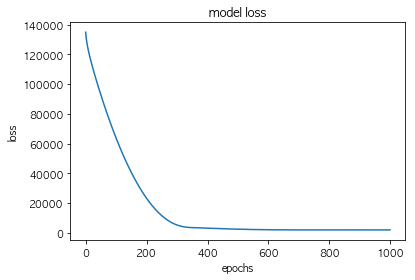

In [25]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [26]:
model.predict(np.array([100, 44]).reshape(1,2))

array([[372.68344]], dtype=float32)

In [27]:
model.predict(np.array([60, 25]).reshape(1, 2))

array([[219.60904]], dtype=float32)

In [28]:
w_, b_ = model.get_weights()
print('Weight is: ', w_)
print('bias is', b_)

Weight is:  [[1.1937457]
 [5.543399 ]]
bias is [9.399319]


In [29]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, w_) + b_


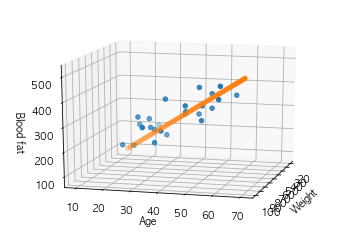

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

In [32]:
import seaborn as sns
%matplotlib inline

tf.set_random_seed(777)
print('python version', sys.version)
print('tensor version', tf.__version__)
print('keras version', keras.__version__)

python version 3.6.5 (default, Jun 17 2018, 12:26:58) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
tensor version 1.8.0
keras version 2.2.2


In [33]:
raw_data = pd.read_excel('data/titanic.xls')

In [34]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [35]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [36]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


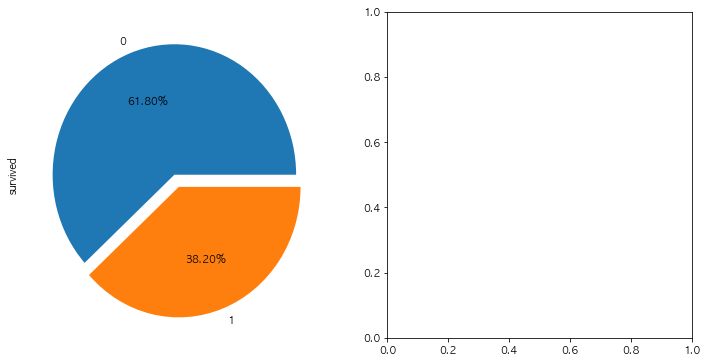

In [37]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])

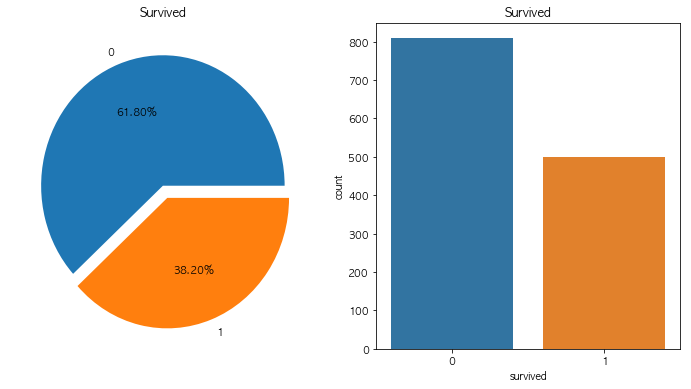

In [38]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

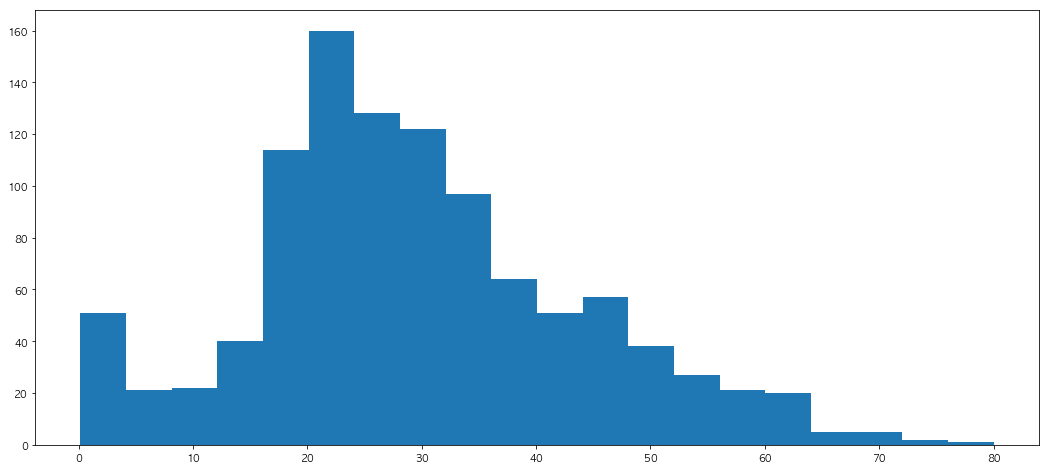

In [39]:
raw_data['age'].hist(bins=20, figsize=(18, 8), grid=False)

In [40]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


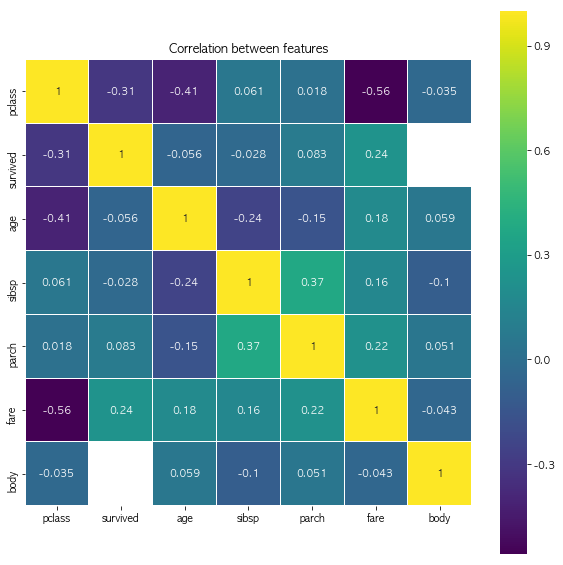

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between features')
plt.show()

In [42]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 7 , 15, 30, 60, 100], include_lowest=True, labels=['baby', 'teenage', 'young', 'adult', 'old'])

In [43]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


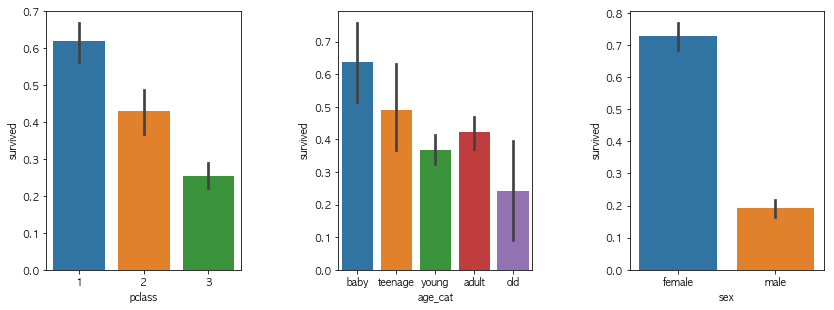

In [44]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

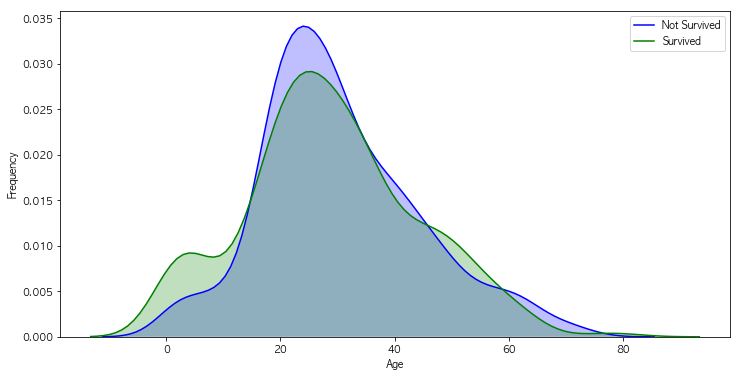

In [45]:
f, ax = plt.subplots(figsize=(12, 6))
g = sns.kdeplot(raw_data['age'][(raw_data['survived'] == 0) & (raw_data['age'].notnull())], ax=ax, color='Blue', shade=True) 
g = sns.kdeplot(raw_data['age'][(raw_data['survived'] == 1) & (raw_data['age'].notnull())], ax=ax, color='Green', shade=True) 
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

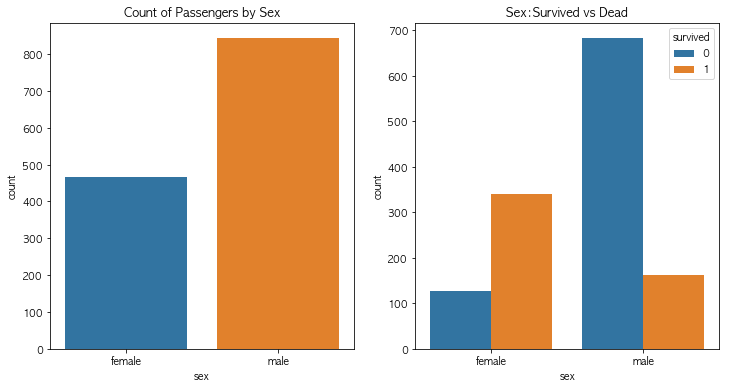

In [46]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot('sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [47]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


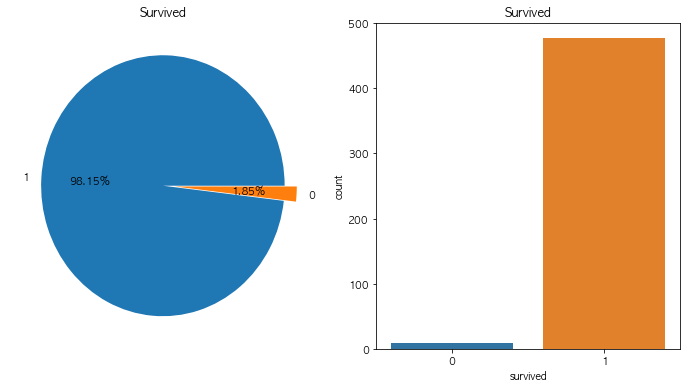

In [48]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [49]:
raw_data['title'] = raw_data['name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [50]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [51]:
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [52]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Miss')
Rare = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [53]:
print(raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.679245
1    Mr  0.162483
2   Mrs  0.786802
3  Rare  0.466667


In [54]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [55]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

In [56]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [57]:
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null int64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
title        1045 non-null object
dtypes: category(1), float64(7), int64(1), object(7)
memory usage: 131.8+ KB


In [58]:
x_data = raw_data.values[:, [0, 3, 4, 5, 6, 8]]
y_data = raw_data.values[:, [1]]
x_data.shape, y_data.shape

((1045, 6), (1045, 1))

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

In [60]:
len(x_train), len(x_test), len(y_train), len(y_test)

(940, 105, 940, 105)

In [61]:
np.random.seed(7)

In [62]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense(255, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 255)               1785      
_________________________________________________________________
dense_3 (Dense)              (None, 255)               65280     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 256       
Total params: 67,321
Trainable params: 67,321
Non-trainable params: 0
_________________________________________________________________


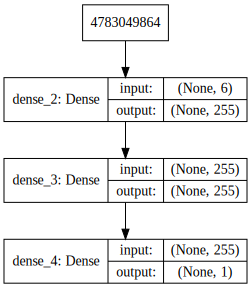

In [63]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [64]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000)

Train on 940 samples, validate on 105 samples
Epoch 1/1000
940/940 [==============================] - 0s 346us/step - loss: 0.2603 - acc: 0.6521 - val_loss: 0.1905 - val_acc: 0.7619
Epoch 2/1000
940/940 [==============================] - 0s 108us/step - loss: 0.2208 - acc: 0.6777 - val_loss: 0.2074 - val_acc: 0.7238
Epoch 3/1000
940/940 [==============================] - 0s 114us/step - loss: 0.2407 - acc: 0.6723 - val_loss: 0.1944 - val_acc: 0.7619
Epoch 4/1000
940/940 [==============================] - 0s 92us/step - loss: 0.1964 - acc: 0.7117 - val_loss: 0.1709 - val_acc: 0.7810
Epoch 5/1000
940/940 [==============================] - 0s 77us/step - loss: 0.1921 - acc: 0.7394 - val_loss: 0.1703 - val_acc: 0.7810
Epoch 6/1000
940/940 [==============================] - 0s 102us/step - loss: 0.2460 - acc: 0.6766 - val_loss: 0.2341 - val_acc: 0.6952
Epoch 7/1000
940/940 [==============================] - 0s 108us/step - loss: 0.2190 - acc: 0.7170 - val_loss: 0.2121 - val_acc: 0.7048
Epoc

940/940 [==============================] - 0s 109us/step - loss: 0.1534 - acc: 0.7947 - val_loss: 0.1528 - val_acc: 0.7810
Epoch 61/1000
940/940 [==============================] - 0s 110us/step - loss: 0.1385 - acc: 0.8096 - val_loss: 0.1540 - val_acc: 0.8286
Epoch 62/1000
940/940 [==============================] - 0s 109us/step - loss: 0.1396 - acc: 0.8096 - val_loss: 0.1486 - val_acc: 0.8476
Epoch 63/1000
940/940 [==============================] - 0s 105us/step - loss: 0.1393 - acc: 0.8149 - val_loss: 0.1615 - val_acc: 0.8000
Epoch 64/1000
940/940 [==============================] - 0s 81us/step - loss: 0.1422 - acc: 0.8043 - val_loss: 0.1504 - val_acc: 0.8190
Epoch 65/1000
940/940 [==============================] - 0s 82us/step - loss: 0.1403 - acc: 0.8138 - val_loss: 0.1566 - val_acc: 0.8286
Epoch 66/1000
940/940 [==============================] - 0s 99us/step - loss: 0.1388 - acc: 0.8032 - val_loss: 0.1542 - val_acc: 0.8190
Epoch 67/1000
940/940 [==============================] - 0

Epoch 120/1000
940/940 [==============================] - 0s 73us/step - loss: 0.1274 - acc: 0.8234 - val_loss: 0.1501 - val_acc: 0.7905
Epoch 121/1000
940/940 [==============================] - 0s 105us/step - loss: 0.1266 - acc: 0.8234 - val_loss: 0.1433 - val_acc: 0.8286
Epoch 122/1000
940/940 [==============================] - 0s 86us/step - loss: 0.1254 - acc: 0.8245 - val_loss: 0.1513 - val_acc: 0.7905
Epoch 123/1000
940/940 [==============================] - 0s 77us/step - loss: 0.1304 - acc: 0.8181 - val_loss: 0.1514 - val_acc: 0.8286
Epoch 124/1000
940/940 [==============================] - 0s 98us/step - loss: 0.1287 - acc: 0.8234 - val_loss: 0.1482 - val_acc: 0.8190
Epoch 125/1000
940/940 [==============================] - 0s 97us/step - loss: 0.1250 - acc: 0.8277 - val_loss: 0.1457 - val_acc: 0.8095
Epoch 126/1000
940/940 [==============================] - 0s 97us/step - loss: 0.1275 - acc: 0.8234 - val_loss: 0.1668 - val_acc: 0.8095
Epoch 127/1000
940/940 [================

940/940 [==============================] - 0s 112us/step - loss: 0.1231 - acc: 0.8372 - val_loss: 0.1429 - val_acc: 0.8190
Epoch 180/1000
940/940 [==============================] - 0s 99us/step - loss: 0.1224 - acc: 0.8362 - val_loss: 0.1595 - val_acc: 0.8095
Epoch 181/1000
940/940 [==============================] - 0s 96us/step - loss: 0.1218 - acc: 0.8351 - val_loss: 0.1689 - val_acc: 0.8000
Epoch 182/1000
940/940 [==============================] - 0s 96us/step - loss: 0.1306 - acc: 0.8287 - val_loss: 0.1487 - val_acc: 0.8190
Epoch 183/1000
940/940 [==============================] - 0s 85us/step - loss: 0.1254 - acc: 0.8245 - val_loss: 0.1459 - val_acc: 0.8190
Epoch 184/1000
940/940 [==============================] - 0s 74us/step - loss: 0.1219 - acc: 0.8330 - val_loss: 0.1502 - val_acc: 0.7810
Epoch 185/1000
940/940 [==============================] - 0s 73us/step - loss: 0.1257 - acc: 0.8319 - val_loss: 0.1517 - val_acc: 0.8190
Epoch 186/1000
940/940 [==============================]

Epoch 239/1000
940/940 [==============================] - 0s 99us/step - loss: 0.1182 - acc: 0.8372 - val_loss: 0.1866 - val_acc: 0.7810
Epoch 240/1000
940/940 [==============================] - 0s 101us/step - loss: 0.1246 - acc: 0.8394 - val_loss: 0.1662 - val_acc: 0.8000
Epoch 241/1000
940/940 [==============================] - 0s 98us/step - loss: 0.1153 - acc: 0.8521 - val_loss: 0.1566 - val_acc: 0.8000
Epoch 242/1000
940/940 [==============================] - 0s 98us/step - loss: 0.1147 - acc: 0.8415 - val_loss: 0.1558 - val_acc: 0.8000
Epoch 243/1000
940/940 [==============================] - 0s 99us/step - loss: 0.1140 - acc: 0.8468 - val_loss: 0.1601 - val_acc: 0.8000
Epoch 244/1000
940/940 [==============================] - 0s 97us/step - loss: 0.1121 - acc: 0.8436 - val_loss: 0.1587 - val_acc: 0.7714
Epoch 245/1000
940/940 [==============================] - 0s 73us/step - loss: 0.1149 - acc: 0.8489 - val_loss: 0.1523 - val_acc: 0.7905
Epoch 246/1000
940/940 [================

Epoch 299/1000
940/940 [==============================] - 0s 77us/step - loss: 0.1076 - acc: 0.8489 - val_loss: 0.1602 - val_acc: 0.7810
Epoch 300/1000
940/940 [==============================] - 0s 75us/step - loss: 0.1080 - acc: 0.8489 - val_loss: 0.1587 - val_acc: 0.8000
Epoch 301/1000
940/940 [==============================] - 0s 97us/step - loss: 0.1079 - acc: 0.8521 - val_loss: 0.1612 - val_acc: 0.7905
Epoch 302/1000
940/940 [==============================] - 0s 96us/step - loss: 0.1092 - acc: 0.8564 - val_loss: 0.1605 - val_acc: 0.8000
Epoch 303/1000
940/940 [==============================] - 0s 89us/step - loss: 0.1077 - acc: 0.8553 - val_loss: 0.1480 - val_acc: 0.8190
Epoch 304/1000
940/940 [==============================] - 0s 76us/step - loss: 0.1049 - acc: 0.8553 - val_loss: 0.1719 - val_acc: 0.7905
Epoch 305/1000
940/940 [==============================] - 0s 96us/step - loss: 0.1082 - acc: 0.8564 - val_loss: 0.1539 - val_acc: 0.8095
Epoch 306/1000
940/940 [=================

940/940 [==============================] - 0s 112us/step - loss: 0.1279 - acc: 0.8340 - val_loss: 0.1525 - val_acc: 0.8190
Epoch 359/1000
940/940 [==============================] - 0s 94us/step - loss: 0.1069 - acc: 0.8564 - val_loss: 0.1727 - val_acc: 0.7905
Epoch 360/1000
940/940 [==============================] - 0s 96us/step - loss: 0.1012 - acc: 0.8691 - val_loss: 0.1625 - val_acc: 0.7810
Epoch 361/1000
940/940 [==============================] - 0s 96us/step - loss: 0.1056 - acc: 0.8606 - val_loss: 0.1858 - val_acc: 0.7524
Epoch 362/1000
940/940 [==============================] - 0s 93us/step - loss: 0.1014 - acc: 0.8649 - val_loss: 0.1808 - val_acc: 0.7619
Epoch 363/1000
940/940 [==============================] - 0s 74us/step - loss: 0.1021 - acc: 0.8628 - val_loss: 0.1666 - val_acc: 0.7619
Epoch 364/1000
940/940 [==============================] - 0s 95us/step - loss: 0.1014 - acc: 0.8702 - val_loss: 0.1701 - val_acc: 0.7714
Epoch 365/1000
940/940 [==============================]

Epoch 418/1000
940/940 [==============================] - 0s 118us/step - loss: 0.0934 - acc: 0.8809 - val_loss: 0.1676 - val_acc: 0.7714
Epoch 419/1000
940/940 [==============================] - 0s 98us/step - loss: 0.0980 - acc: 0.8723 - val_loss: 0.1743 - val_acc: 0.7714
Epoch 420/1000
940/940 [==============================] - 0s 102us/step - loss: 0.1027 - acc: 0.8617 - val_loss: 0.1655 - val_acc: 0.8095
Epoch 421/1000
940/940 [==============================] - 0s 100us/step - loss: 0.0943 - acc: 0.8734 - val_loss: 0.1688 - val_acc: 0.7714
Epoch 422/1000
940/940 [==============================] - 0s 74us/step - loss: 0.0940 - acc: 0.8723 - val_loss: 0.1641 - val_acc: 0.8000
Epoch 423/1000
940/940 [==============================] - 0s 88us/step - loss: 0.0977 - acc: 0.8681 - val_loss: 0.1675 - val_acc: 0.7619
Epoch 424/1000
940/940 [==============================] - 0s 101us/step - loss: 0.0984 - acc: 0.8691 - val_loss: 0.1953 - val_acc: 0.7524
Epoch 425/1000
940/940 [=============

940/940 [==============================] - 0s 73us/step - loss: 0.0953 - acc: 0.8755 - val_loss: 0.1678 - val_acc: 0.7619
Epoch 478/1000
940/940 [==============================] - 0s 71us/step - loss: 0.0912 - acc: 0.8755 - val_loss: 0.1902 - val_acc: 0.7524
Epoch 479/1000
940/940 [==============================] - 0s 72us/step - loss: 0.0905 - acc: 0.8702 - val_loss: 0.1675 - val_acc: 0.7619
Epoch 480/1000
940/940 [==============================] - 0s 79us/step - loss: 0.0892 - acc: 0.8787 - val_loss: 0.1691 - val_acc: 0.7714
Epoch 481/1000
940/940 [==============================] - 0s 77us/step - loss: 0.0911 - acc: 0.8798 - val_loss: 0.1645 - val_acc: 0.7810
Epoch 482/1000
940/940 [==============================] - 0s 77us/step - loss: 0.0958 - acc: 0.8755 - val_loss: 0.1849 - val_acc: 0.7524
Epoch 483/1000
940/940 [==============================] - 0s 81us/step - loss: 0.1014 - acc: 0.8596 - val_loss: 0.1684 - val_acc: 0.7810
Epoch 484/1000
940/940 [==============================] 

Epoch 537/1000
940/940 [==============================] - 0s 101us/step - loss: 0.0879 - acc: 0.8723 - val_loss: 0.1779 - val_acc: 0.7714
Epoch 538/1000
940/940 [==============================] - 0s 99us/step - loss: 0.0907 - acc: 0.8819 - val_loss: 0.1788 - val_acc: 0.7619
Epoch 539/1000
940/940 [==============================] - 0s 107us/step - loss: 0.0887 - acc: 0.8798 - val_loss: 0.1813 - val_acc: 0.7524
Epoch 540/1000
940/940 [==============================] - 0s 100us/step - loss: 0.0849 - acc: 0.8840 - val_loss: 0.1801 - val_acc: 0.7619
Epoch 541/1000
940/940 [==============================] - 0s 104us/step - loss: 0.0832 - acc: 0.8862 - val_loss: 0.1794 - val_acc: 0.7619
Epoch 542/1000
940/940 [==============================] - 0s 73us/step - loss: 0.0863 - acc: 0.8819 - val_loss: 0.1734 - val_acc: 0.7714
Epoch 543/1000
940/940 [==============================] - 0s 79us/step - loss: 0.0888 - acc: 0.8787 - val_loss: 0.1616 - val_acc: 0.7810
Epoch 544/1000
940/940 [=============

940/940 [==============================] - 0s 74us/step - loss: 0.0835 - acc: 0.8915 - val_loss: 0.1736 - val_acc: 0.7810
Epoch 597/1000
940/940 [==============================] - 0s 70us/step - loss: 0.0816 - acc: 0.8968 - val_loss: 0.1761 - val_acc: 0.7524
Epoch 598/1000
940/940 [==============================] - 0s 73us/step - loss: 0.0949 - acc: 0.8766 - val_loss: 0.1772 - val_acc: 0.7619
Epoch 599/1000
940/940 [==============================] - 0s 73us/step - loss: 0.0890 - acc: 0.8809 - val_loss: 0.1699 - val_acc: 0.7905
Epoch 600/1000
940/940 [==============================] - 0s 86us/step - loss: 0.0888 - acc: 0.8883 - val_loss: 0.1746 - val_acc: 0.7714
Epoch 601/1000
940/940 [==============================] - 0s 94us/step - loss: 0.0867 - acc: 0.8851 - val_loss: 0.1645 - val_acc: 0.7905
Epoch 602/1000
940/940 [==============================] - 0s 74us/step - loss: 0.0846 - acc: 0.8904 - val_loss: 0.1643 - val_acc: 0.7905
Epoch 603/1000
940/940 [==============================] 

Epoch 656/1000
940/940 [==============================] - 0s 75us/step - loss: 0.0794 - acc: 0.8915 - val_loss: 0.1839 - val_acc: 0.7619
Epoch 657/1000
940/940 [==============================] - 0s 99us/step - loss: 0.0871 - acc: 0.8851 - val_loss: 0.1840 - val_acc: 0.7714
Epoch 658/1000
940/940 [==============================] - 0s 100us/step - loss: 0.0836 - acc: 0.8894 - val_loss: 0.1765 - val_acc: 0.7714
Epoch 659/1000
940/940 [==============================] - 0s 102us/step - loss: 0.0857 - acc: 0.8840 - val_loss: 0.1803 - val_acc: 0.7619
Epoch 660/1000
940/940 [==============================] - 0s 103us/step - loss: 0.0871 - acc: 0.8819 - val_loss: 0.1899 - val_acc: 0.7619
Epoch 661/1000
940/940 [==============================] - 0s 102us/step - loss: 0.0950 - acc: 0.8755 - val_loss: 0.1663 - val_acc: 0.7810
Epoch 662/1000
940/940 [==============================] - 0s 104us/step - loss: 0.0852 - acc: 0.8840 - val_loss: 0.1747 - val_acc: 0.7810
Epoch 663/1000
940/940 [============

940/940 [==============================] - 0s 112us/step - loss: 0.0802 - acc: 0.8904 - val_loss: 0.1910 - val_acc: 0.7714
Epoch 716/1000
940/940 [==============================] - 0s 99us/step - loss: 0.0779 - acc: 0.8979 - val_loss: 0.1812 - val_acc: 0.7810
Epoch 717/1000
940/940 [==============================] - 0s 101us/step - loss: 0.0772 - acc: 0.8989 - val_loss: 0.1778 - val_acc: 0.7714
Epoch 718/1000
940/940 [==============================] - 0s 100us/step - loss: 0.0769 - acc: 0.9011 - val_loss: 0.1855 - val_acc: 0.7619
Epoch 719/1000
940/940 [==============================] - 0s 103us/step - loss: 0.0842 - acc: 0.8830 - val_loss: 0.1854 - val_acc: 0.7905
Epoch 720/1000
940/940 [==============================] - 0s 75us/step - loss: 0.0780 - acc: 0.8915 - val_loss: 0.1771 - val_acc: 0.7810
Epoch 721/1000
940/940 [==============================] - 0s 90us/step - loss: 0.0789 - acc: 0.8947 - val_loss: 0.1865 - val_acc: 0.7619
Epoch 722/1000
940/940 [============================

Epoch 775/1000
940/940 [==============================] - 0s 74us/step - loss: 0.0805 - acc: 0.8872 - val_loss: 0.1825 - val_acc: 0.7714
Epoch 776/1000
940/940 [==============================] - 0s 95us/step - loss: 0.0799 - acc: 0.8915 - val_loss: 0.1772 - val_acc: 0.7714
Epoch 777/1000
940/940 [==============================] - 0s 103us/step - loss: 0.0805 - acc: 0.8989 - val_loss: 0.1881 - val_acc: 0.7619
Epoch 778/1000
940/940 [==============================] - 0s 102us/step - loss: 0.0780 - acc: 0.9032 - val_loss: 0.1837 - val_acc: 0.7714
Epoch 779/1000
940/940 [==============================] - 0s 101us/step - loss: 0.0750 - acc: 0.9011 - val_loss: 0.1880 - val_acc: 0.7619
Epoch 780/1000
940/940 [==============================] - 0s 85us/step - loss: 0.0768 - acc: 0.9021 - val_loss: 0.1798 - val_acc: 0.7714
Epoch 781/1000
940/940 [==============================] - 0s 73us/step - loss: 0.0761 - acc: 0.9000 - val_loss: 0.1838 - val_acc: 0.7714
Epoch 782/1000
940/940 [==============

940/940 [==============================] - 0s 111us/step - loss: 0.0820 - acc: 0.8926 - val_loss: 0.1877 - val_acc: 0.7619
Epoch 835/1000
940/940 [==============================] - 0s 103us/step - loss: 0.0894 - acc: 0.8862 - val_loss: 0.1697 - val_acc: 0.8000
Epoch 836/1000
940/940 [==============================] - 0s 108us/step - loss: 0.0821 - acc: 0.8851 - val_loss: 0.1792 - val_acc: 0.7714
Epoch 837/1000
940/940 [==============================] - 0s 102us/step - loss: 0.0831 - acc: 0.8926 - val_loss: 0.1703 - val_acc: 0.7714
Epoch 838/1000
940/940 [==============================] - 0s 84us/step - loss: 0.0816 - acc: 0.8947 - val_loss: 0.1717 - val_acc: 0.7714
Epoch 839/1000
940/940 [==============================] - 0s 89us/step - loss: 0.0831 - acc: 0.8947 - val_loss: 0.1793 - val_acc: 0.7714
Epoch 840/1000
940/940 [==============================] - 0s 98us/step - loss: 0.0801 - acc: 0.8936 - val_loss: 0.1665 - val_acc: 0.7714
Epoch 841/1000
940/940 [============================

Epoch 894/1000
940/940 [==============================] - 0s 75us/step - loss: 0.0870 - acc: 0.8915 - val_loss: 0.1770 - val_acc: 0.7810
Epoch 895/1000
940/940 [==============================] - 0s 77us/step - loss: 0.0816 - acc: 0.8872 - val_loss: 0.1765 - val_acc: 0.7524
Epoch 896/1000
940/940 [==============================] - 0s 71us/step - loss: 0.0776 - acc: 0.9011 - val_loss: 0.1733 - val_acc: 0.7619
Epoch 897/1000
940/940 [==============================] - 0s 81us/step - loss: 0.0780 - acc: 0.9053 - val_loss: 0.1788 - val_acc: 0.7714
Epoch 898/1000
940/940 [==============================] - 0s 97us/step - loss: 0.0762 - acc: 0.8989 - val_loss: 0.1746 - val_acc: 0.7619
Epoch 899/1000
940/940 [==============================] - 0s 101us/step - loss: 0.0751 - acc: 0.9043 - val_loss: 0.1811 - val_acc: 0.7619
Epoch 900/1000
940/940 [==============================] - 0s 98us/step - loss: 0.0772 - acc: 0.9053 - val_loss: 0.1890 - val_acc: 0.7619
Epoch 901/1000
940/940 [================

940/940 [==============================] - 0s 72us/step - loss: 0.0758 - acc: 0.8968 - val_loss: 0.1689 - val_acc: 0.7714
Epoch 954/1000
940/940 [==============================] - 0s 79us/step - loss: 0.0736 - acc: 0.9053 - val_loss: 0.1861 - val_acc: 0.7714
Epoch 955/1000
940/940 [==============================] - 0s 100us/step - loss: 0.0736 - acc: 0.9053 - val_loss: 0.1735 - val_acc: 0.7714
Epoch 956/1000
940/940 [==============================] - 0s 99us/step - loss: 0.0729 - acc: 0.9021 - val_loss: 0.1793 - val_acc: 0.7619
Epoch 957/1000
940/940 [==============================] - 0s 102us/step - loss: 0.0744 - acc: 0.9053 - val_loss: 0.1817 - val_acc: 0.7714
Epoch 958/1000
940/940 [==============================] - 0s 96us/step - loss: 0.0724 - acc: 0.9032 - val_loss: 0.1729 - val_acc: 0.7619
Epoch 959/1000
940/940 [==============================] - 0s 74us/step - loss: 0.0726 - acc: 0.9053 - val_loss: 0.1942 - val_acc: 0.7619
Epoch 960/1000
940/940 [==============================

In [65]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

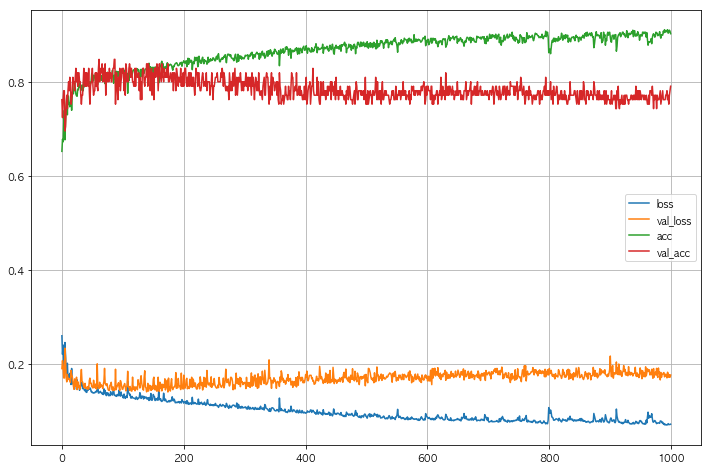

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

In [67]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1, 6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)

In [68]:
model.predict(dicaprio)


array([[0.03191201]], dtype=float32)

In [69]:
model.predict(winslet)

array([[1.]], dtype=float32)

In [70]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [71]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [72]:
x_train = x_train/255
x_test = x_test/255

In [73]:
import random
samples = random.choices(population=range(0, 60000), k=16)

In [74]:
samples

[25456,
 40194,
 50554,
 8277,
 24772,
 47215,
 14713,
 6671,
 19078,
 55027,
 1893,
 2575,
 58367,
 58086,
 42470,
 55078]

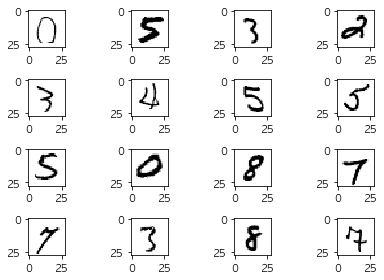

In [75]:
count = 0
nrows = ncols = 4
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show()

In [76]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

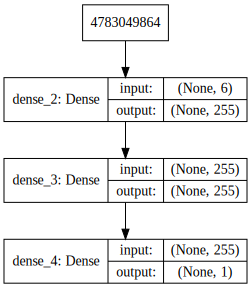

In [77]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [78]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2665 - acc: 0.9252 - val_loss: 0.1334 - val_acc: 0.9613
Epoch 2/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1045 - acc: 0.9700 - val_loss: 0.0900 - val_acc: 0.9730
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0664 - acc: 0.9805 - val_loss: 0.0767 - val_acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0473 - acc: 0.9857 - val_loss: 0.0633 - val_acc: 0.9807
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0332 - acc: 0.9909 - val_loss: 0.0624 - val_acc: 0.9799
Epoch 6/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0246 - acc: 0.9934 - val_loss: 0.0657 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0178 - acc: 0.9953 - val_loss: 0.0601 - 

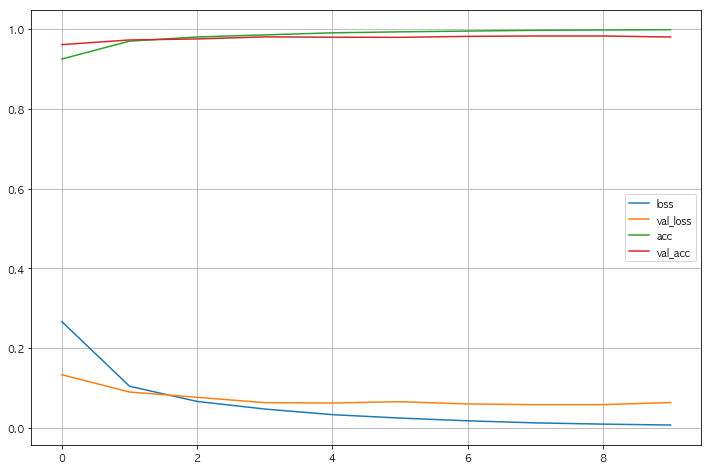

In [81]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

In [82]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.06356747177321667
Test accuracy 0.9803


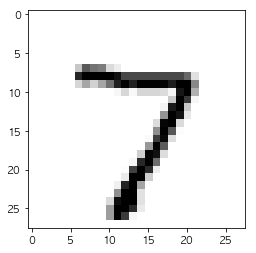

The Answer is [7]


In [83]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is', model.predict_classes(x_test[n].reshape(1, 784)))

In [84]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels

array([7, 2, 1, ..., 4, 5, 6])

In [85]:
test_labels = np.argmax(y_test, axis=1)
test_labels

array([7, 2, 1, ..., 4, 5, 6])

In [86]:
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
len(wrong_result)

197

In [87]:
samples = random.choices(population=wrong_result, k=16)
samples

[3853,
 1530,
 4639,
 1014,
 1242,
 4578,
 8456,
 4740,
 3567,
 2863,
 3520,
 321,
 2953,
 2189,
 1156,
 4360]

Label:6, Prediction:2
Label:8, Prediction:7
Label:8, Prediction:9
Label:6, Prediction:5
Label:4, Prediction:9
Label:7, Prediction:9
Label:8, Prediction:0
Label:3, Prediction:5
Label:8, Prediction:5
Label:9, Prediction:4
Label:6, Prediction:4
Label:2, Prediction:7
Label:3, Prediction:8
Label:9, Prediction:1
Label:7, Prediction:8
Label:5, Prediction:3


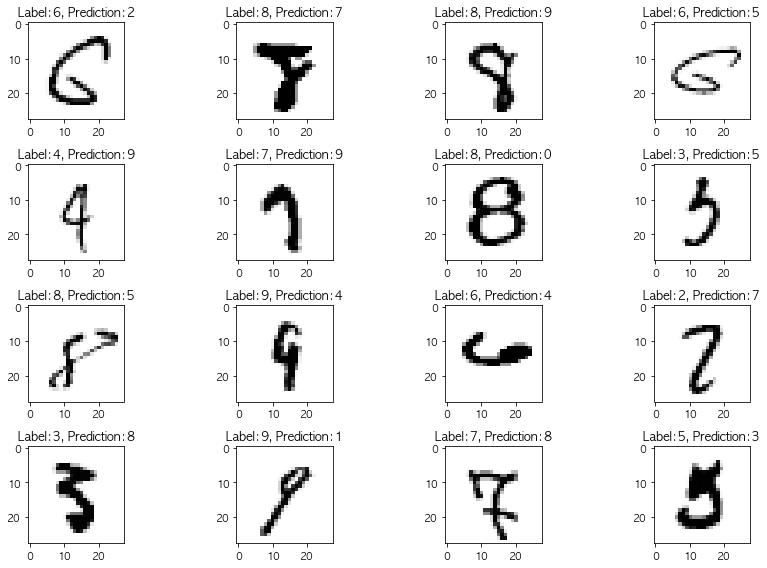

In [88]:
count = 0
nrows = ncols = 4
plt.figure(figsize=(12, 8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    print(tmp)
    plt.title(tmp)

plt.tight_layout()
plt.show()


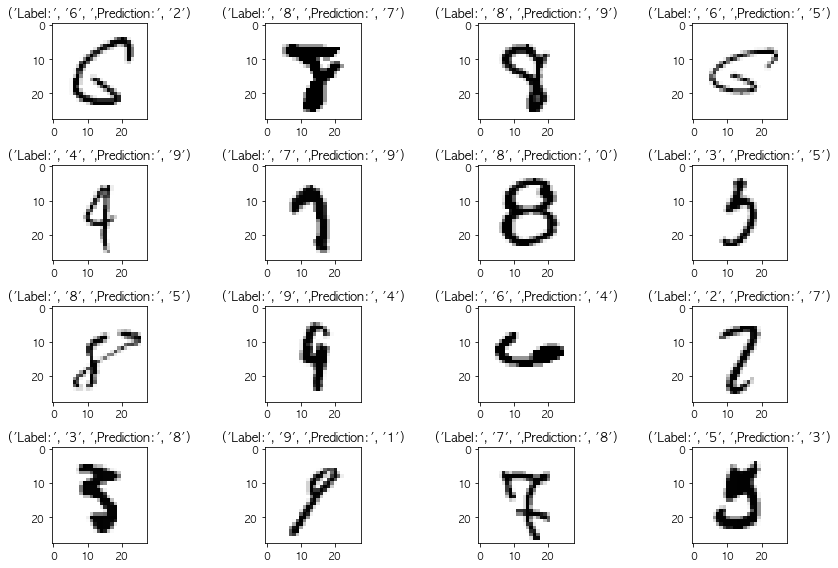

In [89]:
count=0
nrows=ncols=4
plt.figure(figsize=(12,8))

for n in samples:
    count+=1
    plt.subplot(nrows,ncols,count)
    plt.imshow(x_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
    tmp="Label:", str(test_labels[n]), ",Prediction:", str(predicted_labels[n])
    plt.title(tmp)
    
plt.tight_layout()
plt.show()

In [90]:
samples

[3853,
 1530,
 4639,
 1014,
 1242,
 4578,
 8456,
 4740,
 3567,
 2863,
 3520,
 321,
 2953,
 2189,
 1156,
 4360]

Text(0.5,1,'Label:5, Prediction:3')

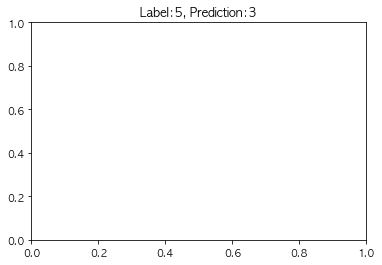

In [91]:
plt.title('Label:' + str(test_labels[n]) + ', Prediction:' + str(predicted_labels[n]))

In [92]:
'Label:' + str(test_labels[n]) + ', Prediction:' + str(predicted_labels[n])

'Label:5, Prediction:3'

In [93]:
import matplotlib.pyplot as plt

In [94]:
!pip list

Package             Version  
------------------- ---------
absl-py             0.4.1    
appnope             0.1.0    
astor               0.7.1    
backcall            0.1.0    
bleach              1.5.0    
cycler              0.10.0   
decorator           4.3.0    
entrypoints         0.2.3    
gast                0.2.0    
graphviz            0.9      
grpcio              1.14.1   
h5py                2.8.0    
html5lib            0.9999999
ipykernel           4.9.0    
ipython             6.5.0    
ipython-genutils    0.2.0    
jedi                0.12.1   
Jinja2              2.10     
jsonschema          2.6.0    
jupyter-client      5.2.3    
jupyter-core        4.4.0    
Keras               2.2.2    
Keras-Applications  1.0.4    
Keras-Preprocessing 1.0.2    
kiwisolver          1.0.1    
Markdown            2.6.11   
MarkupSafe          1.0      
matplotlib          2.2.3    
mistune             0.8.3    
nbconvert           5.3.1    
nbformat            4.4.0    
notebook  